In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.optimize as opt
%matplotlib inline


In [2]:
# clean all files to text files
listdir=os.listdir("235RC/")
count=0
for path in listdir:
    if not path.endswith(".txt") and os.path.isfile(os.path.join("235RC",path)):
        print("adding .txt to : ",path)
        os.rename(os.path.join("235RC",path),os.path.join("235RC",path+".txt"))
        count+=1
print(count,"files textified")

adding .txt to :  235RC_pin06-10_VgIds_Vds10mV_Vg20_pin4Vtop30updown_2016-07-10_run3-1
adding .txt to :  235RC_pin06-10_VgIds_Vds10mV_Vg20_pin4Vtop30updown_2016-07-10_run3-2
2 files textified


In [3]:

def npcombinesweep(path1,path2):
    data1=np.genfromtxt(path1,skip_header=1)
    mult1=[  [-1,1]  if x<len(data1)/2 else [1,1] for x in range(len(data1))]
    
    
    data2=np.genfromtxt(path2,skip_header=1)
    mult2=[  [-1,1]  if x>len(data2)/2 else [1,1] for x in range(len(data2))]
    
    data=np.concatenate((data2*mult1,data1*mult2),axis=0)
    np.savetxt(os.path.splitext(path1)[0][:-2]+".txt",data,delimiter='\t',header="Vg\tIds",comments='')
    os.path.splitext(path1)[0][:-2]+".txt"
    os.remove(path1)
    os.remove(path2)
    



def checkduplicates(folder):
    """checks for 2 part files in the directory and combines them in a 1 then 2 format.
    files should be named ABC_runXX-1.txt and ABC_runXX-2 where ABC and XX must be the same in both parts of the data
    but can be any arbitrary strings."""
    listdir=os.listdir(folder)            
    for path in listdir:
        combine=[]
        #this conditional ensures that only 2 part files will be processed by ensuring that there must be
        #a "-" after "run" in the filename indicating multiple parts
        if path[path.find("run"):].find('-')!=-1:
            for path2 in listdir:        
                if path[:-5] in path2 and path!=path2:
                    #ensures that the files are appended in the correct order
                    if path[-5:-4]>path2[-5:-4]:
                        combine=[os.path.join("235RC",path),os.path.join("235RC",path2)]
                    else:
                        combine=[os.path.join("235RC",path2),os.path.join("235RC",path)]
                    npcombinesweep(combine[0],combine[1])
                    print(combine)
                    listdir.remove(path)
                    listdir.remove(path2)
checkduplicates("235RC/")         
            
    





['235RC/235RC_pin06-10_VgIds_Vds10mV_Vg20_pin4Vtop30updown_2016-07-10_run3-2.txt', '235RC/235RC_pin06-10_VgIds_Vds10mV_Vg20_pin4Vtop30updown_2016-07-10_run3-1.txt']


In [12]:
def plotsweepsback(ax,paths,title):
    listir=os.listdir("235RC/")
    for path in paths:
        
        data=np.genfromtxt(path,skip_header=1)
        ax.plot(data[:,0],data[:,1],".-",label="$\pm$"+path[37:37+path[37:].find('u')]+"Vg")
    ax.set_xlabel("Vg (Volts)",fontsize=15)
    ax.set_ylabel("Ids (Amps)",fontsize=15)
    ax.set_title(title,fontsize=15)
    ax.legend()
    
    
def plotsweepstop(ax,paths,title,labels="",colors=''):
    listir=os.listdir("235RC/")
    for path in paths:   
        data=np.genfromtxt(path,skip_header=1)
        if type(labels)!=list:
            ax.plot(data[:,0],data[:,1],".-",label=path[40:40+path[40:].find('u')])
        elif len(labels)==len(paths)==len(colors):
            ax.plot(data[:,0],data[:,1],".-",label=labels[paths.index(path)],color=colors[paths.index(path)])
        elif len(labels)==len(paths):
            ax.plot(data[:,0],data[:,1],".-",label=labels[paths.index(path)])
        else:
            print("Missmatch between labels and plots")
    ax.set_xlabel("Vg (Volts)",fontsize=15)
    ax.set_ylabel("Ids (Amps)",fontsize=15)
    ax.set_title(title,fontsize=15)
    ax.legend()

948909.345075
Ids at 10mV based on linear fit 1.05384144986e-08 for device 1
11251233.3116
Ids at 10mV based on linear fit 8.88791452725e-10 for device 2


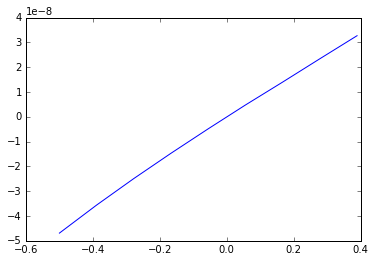

In [38]:
data1=np.genfromtxt('235RC/235RC-6-29-16/235RC_pin03-13_VdsIds_Vg0_2016_06_27.txt',skip_header=2,skip_footer=2)
data2=np.genfromtxt('235RC/235RC-6-29-16/235RC_pin06-10_VdsIds_Vg0_2016_06_27.txt',skip_header=2,skip_footer=2)
plt.plot(data2[:,0],data2[:,1])
r=1/np.polyfit(data1[:,0],data1[:,1],1)[0]
print(r)
i10=.01/r
print("Ids at 10mV based on linear fit",i10,"for device 1")
r=1/np.polyfit(data2[:,0],data2[:,1],1)[0]
print(r)
i10=.01/r
print("Ids at 10mV based on linear fit",i10,"for device 2")


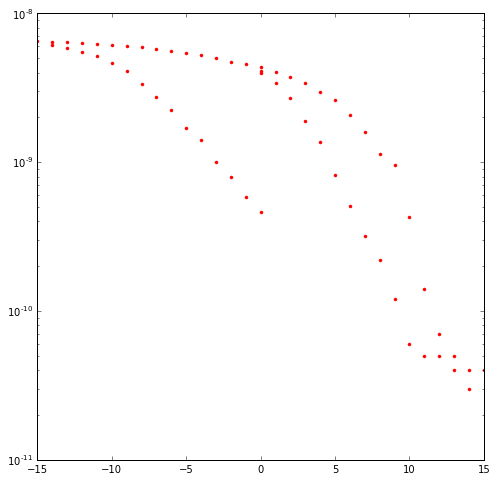

In [9]:

data=np.loadtxt('235RC/235RC_pin06-10_VgIds_Vds10mV_Vg15updown_2016-06-30_run1.txt',skiprows=1)
plt.figure(figsize=(8,8))
plt.semilogy(data[:,0],data[:,1],"r.")

        


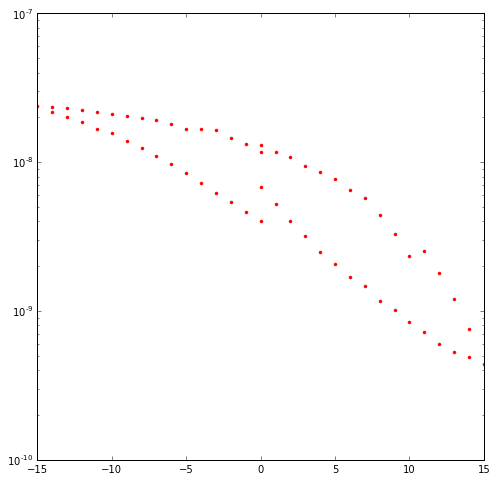

In [10]:
data=np.loadtxt('235RC/235RC_pin03-13_VgIds_Vds10mV_Vg15updown_2016-06-30_run2.txt',skiprows=1)
plt.figure(figsize=(8,8))
plt.semilogy(data[:,0],data[:,1],"r.")

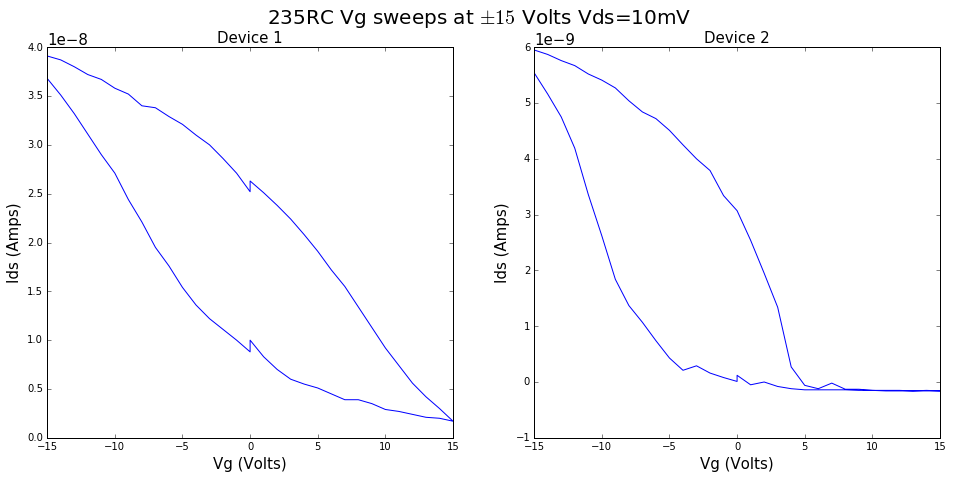

In [11]:
data2=np.loadtxt('235RC/235RC_pin06-10_VgIds_Vds10mV_Vg15updown_2016-06-30_run4.txt',skiprows=1)
data1=np.loadtxt('235RC/235RC_pin03-13_VgIds_Vds10mV_Vg15updown_2016-06-30_run3.txt',skiprows=1)

fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(121)
ax1.plot(data1[:,0],data1[:,1]*1e-9)


ax1.set_xlabel("Vg (Volts)",fontsize=15)
ax1.set_ylabel("Ids (Amps)",fontsize=15)
ax1.set_title("Device 1",fontsize=15)

ax2=plt.subplot(122)
ax2.plot(data2[:,0],data2[:,1]*1e-9)
ax2.set_xlabel("Vg (Volts)",fontsize=15)
ax2.set_ylabel("Ids (Amps)",fontsize=15)
ax2.set_title("Device 2",fontsize=15)
fig.suptitle("235RC Vg sweeps at $\pm 15$ Volts Vds=10mV",fontsize=20)
offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax2.yaxis.get_offset_text()
offset_text.set_size(15)

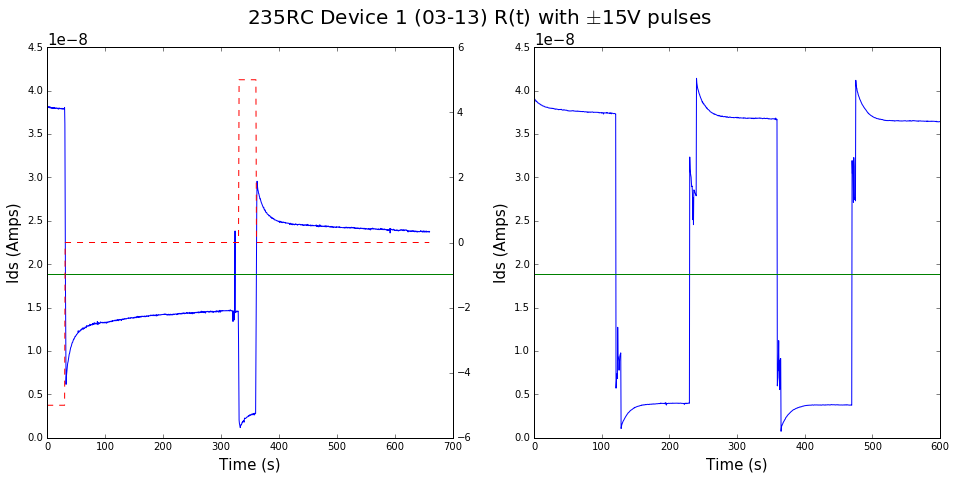

In [30]:
data1=np.loadtxt('235RC/235RC_pin03-13_IdsT_Vds10mV_Vg15updown_2016-06-30_run5.txt',skiprows=1)
data2=np.loadtxt('235RC/235RC_pin03-13_IdsT_Vds10mV_Vg15updown_2016-06-30_run7.txt',skiprows=1)
data3=np.loadtxt('235RC/235RC_pin03-13_IdsT_Vds10mV_Vg15updown_2016-07-01_run1.txt',skiprows=1)
fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(121)
ax1.plot(data3[:,0],data3[:,1])
ax1.axhline(device1true0,color='g')
# adds the Vg pulse sequence to the plot for clarity
ax3=plt.twinx(ax1)
ax3.plot(range(660),[-5 if x<=30 else 0 if 30<x<=330 or 360<x else 5 if 330<x<=360 else 0 for x in range(660)],'r--')


ax1.set_xlabel("Time (s)",fontsize=15)
ax1.set_ylabel("Ids (Amps)",fontsize=15)
ax2=plt.subplot(122,sharey=ax1)
ax2.plot(data2[:,0],data2[:,1])
ax2.axhline(device1true0,color='g')

ax2.set_xlabel("Time (s)",fontsize=15)
ax2.set_ylabel("Ids (Amps)",fontsize=15)
fig.suptitle("235RC Device 1 (03-13) R(t) with $\pm$15V pulses",fontsize=20)
offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax2.yaxis.get_offset_text()
offset_text.set_size(15)

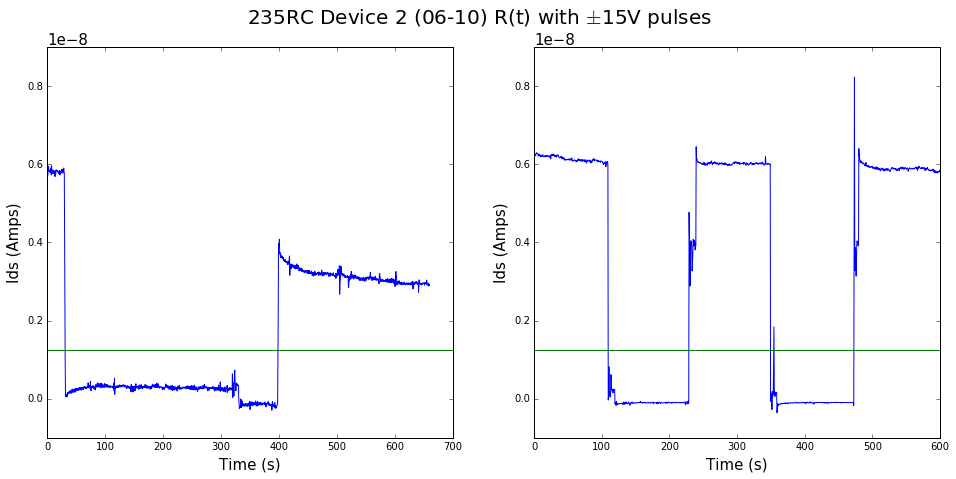

In [32]:
data1=np.loadtxt('235RC/235RC_pin06-10_IdsT_Vds10mV_Vg15updown_2016-06-30_run6.txt',skiprows=1)
data2=np.loadtxt('235RC/235RC_pin06-10_IdsT_Vds10mV_Vg15updown_2016-06-30_run8.txt',skiprows=1)
data3=np.loadtxt('235RC/235RC_pin06-10_IdsT_Vds10mV_Vg15updown_2016-07-01_run2.txt',skiprows=1)

fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(121)
ax1.plot(data3[:,0],data3[:,1])



ax1.set_xlabel("Time (s)",fontsize=15)
ax1.set_ylabel("Ids (Amps)",fontsize=15)
ax2=plt.subplot(122,sharey=ax1)
ax2.plot(data2[:,0],data2[:,1])


ax2.set_xlabel("Time (s)",fontsize=15)
ax2.set_ylabel("Ids (Amps)",fontsize=15)
fig.suptitle("235RC Device 2 (06-10) R(t) with $\pm$15V pulses",fontsize=20)
offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax2.yaxis.get_offset_text()
offset_text.set_size(15)

ax1.axhline(device2true0,color='g')
ax2.axhline(device2true0,color='g')

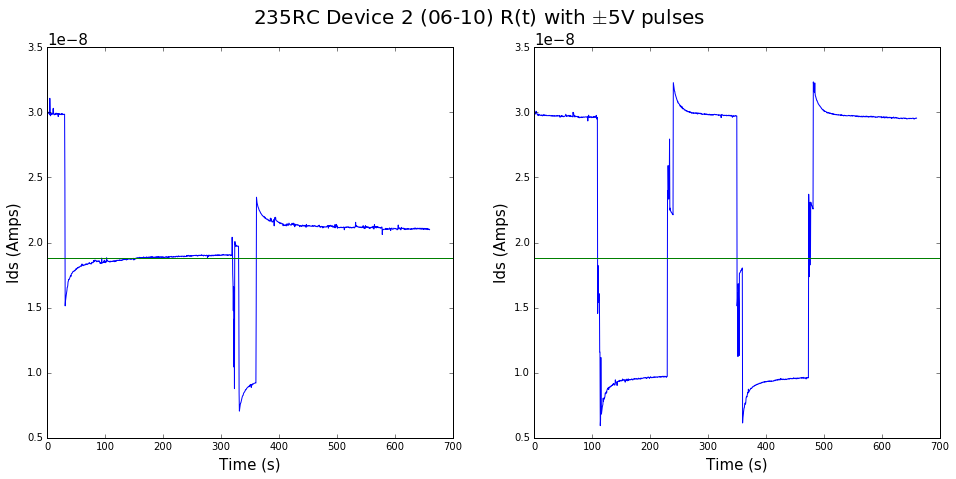

In [35]:
data1=np.loadtxt('235RC/235RC_pin03-13_IdsT_Vds10mV_Vg5updown_2016-07-01_run3.txt',skiprows=1)
data2=np.loadtxt('235RC/235RC_pin03-13_IdsT_Vds10mV_Vg5updown_2016-07-01_run4.txt',skiprows=1)
fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(121)
ax1.plot(data1[:,0],data1[:,1])

ax1.set_xlabel("Time (s)",fontsize=15)
ax1.set_ylabel("Ids (Amps)",fontsize=15)
ax2=plt.subplot(122,sharey=ax1)
ax2.plot(data2[:,0],data2[:,1])

ax2.set_xlabel("Time (s)",fontsize=15)
ax2.set_ylabel("Ids (Amps)",fontsize=15)
fig.suptitle("235RC Device 2 (06-10) R(t) with $\pm$5V pulses",fontsize=20)
offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax2.yaxis.get_offset_text()
offset_text.set_size(15)

ax1.axhline(device1true0,color='g')
ax2.axhline(device1true0,color='g')

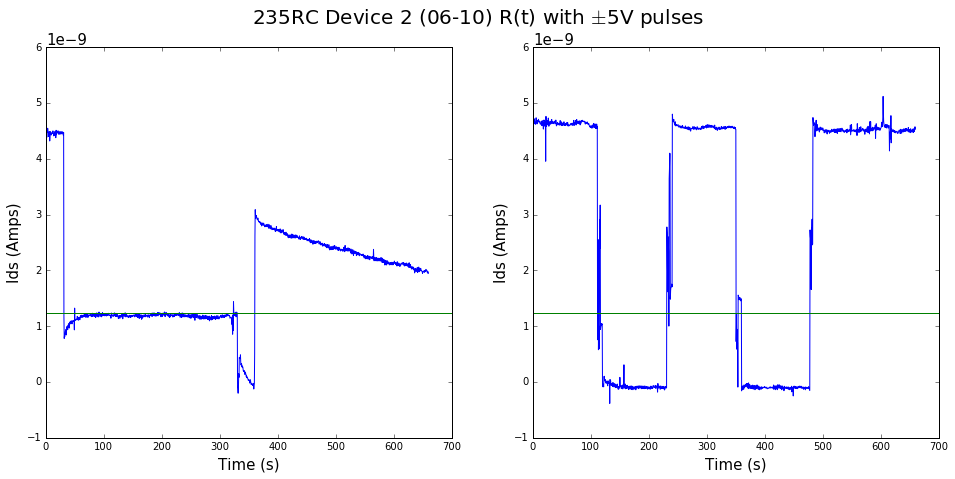

In [33]:
data1=np.loadtxt('235RC/235RC_pin06-10_IdsT_Vds10mV_Vg5updown_2016-07-01_run5.txt',skiprows=1)
data2=np.loadtxt('235RC/235RC_pin06-10_IdsT_Vds10mV_Vg5updown_2016-07-01_run6.txt',skiprows=1)
fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(121)
ax1.plot(data1[:,0],data1[:,1])

ax1.set_xlabel("Time (s)",fontsize=15)
ax1.set_ylabel("Ids (Amps)",fontsize=15)
ax2=plt.subplot(122,sharey=ax1)
ax2.plot(data2[:,0],data2[:,1])

ax2.set_xlabel("Time (s)",fontsize=15)
ax2.set_ylabel("Ids (Amps)",fontsize=15)
fig.suptitle("235RC Device 2 (06-10) R(t) with $\pm$5V pulses",fontsize=20)
offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax2.yaxis.get_offset_text()
offset_text.set_size(15)

ax1.axhline(device2true0,color='g')
ax2.axhline(device2true0,color='g')


In [5]:
# clean all files to text files
listdir=os.listdir("235RC/")
for path in listdir:
    if not path.endswith(".txt") and os.path.isfile(os.path.join("235RC",path)):
        print("adding .txt to : ",path)
        os.rename(os.path.join("235RC",path),os.path.join("235RC",path+".txt"))

In [8]:

def npcombinesweep(path1,path2):
    data1=np.genfromtxt(path1,skip_header=1)
    mult1=[  [-1,1]  if x<len(data1)/2 else [1,1] for x in range(len(data1))]
    
    
    data2=np.genfromtxt(path2,skip_header=1)
    mult2=[  [-1,1]  if x>len(data2)/2 else [1,1] for x in range(len(data2))]
    
    data=np.concatenate((data2*mult1,data1*mult2),axis=0)
    np.savetxt(os.path.splitext(path1)[0][:-2]+".txt",data,delimiter='\t',header="Vg\tIds",comments='')
    os.path.splitext(path1)[0][:-2]+".txt"
    os.remove(path1)
    os.remove(path2)
    



def checkduplicates(folder):
    """checks for 2 part files in the directory and combines them in a 1 then 2 format.
    files should be named ABC_runXX-1.txt and ABC_runXX-2 where ABC and XX must be the same in both parts of the data
    but can be any arbitrary strings."""
    listdir=os.listdir(folder)            
    for path in listdir:
        combine=[]
        #this conditional ensures that only 2 part files will be processed by ensuring that there must be
        #a "-" after "run" in the filename indicating multiple parts
        if path[path.find("run"):].find('-')!=-1:
            for path2 in listdir:        
                if path[:-5] in path2 and path!=path2:
                    #ensures that the files are appended in the correct order
                    if path[-5:-4]>path2[-5:-4]:
                        combine=[os.path.join("235RC",path),os.path.join("235RC",path2)]
                    else:
                        combine=[os.path.join("235RC",path2),os.path.join("235RC",path)]
                    npcombinesweep(combine[0],combine[1])
                    print(combine)
                    listdir.remove(path)
                    listdir.remove(path2)
checkduplicates("235RC/")         
            
    





In [3]:
def plotsweepsback(ax,paths,title):
    listir=os.listdir("235RC/")
    for path in paths:
        
        data=np.genfromtxt(path,skip_header=1)
        ax.plot(data[:,0],data[:,1],".-",label="$\pm$"+path[37:37+path[37:].find('u')]+"Vg")
    ax.set_xlabel("Vg (Volts)",fontsize=15)
    ax.set_ylabel("Ids (Amps)",fontsize=15)
    ax.set_title(title,fontsize=15)
    ax.legend()
    
def plotsweepstop(ax,paths,title,labels=1):
    listir=os.listdir("235RC/")
    for path in paths:   
        data=np.genfromtxt(path,skip_header=1)
        if type(labels)!=list:
            ax.plot(data[:,0],data[:,1],".-",label=path[40:40+path[40:].find('u')])
        elif len(label)==len(paths):
            ax.plot(data[:,0],data[:,1],".-",label=labels[paths.find(path)])
        else:
            print("Missmatch between labels and plots")
    ax.set_xlabel("Vg (Volts)",fontsize=15)
    ax.set_ylabel("Ids (Amps)",fontsize=15)
    ax.set_title(title,fontsize=15)
    ax.legend()

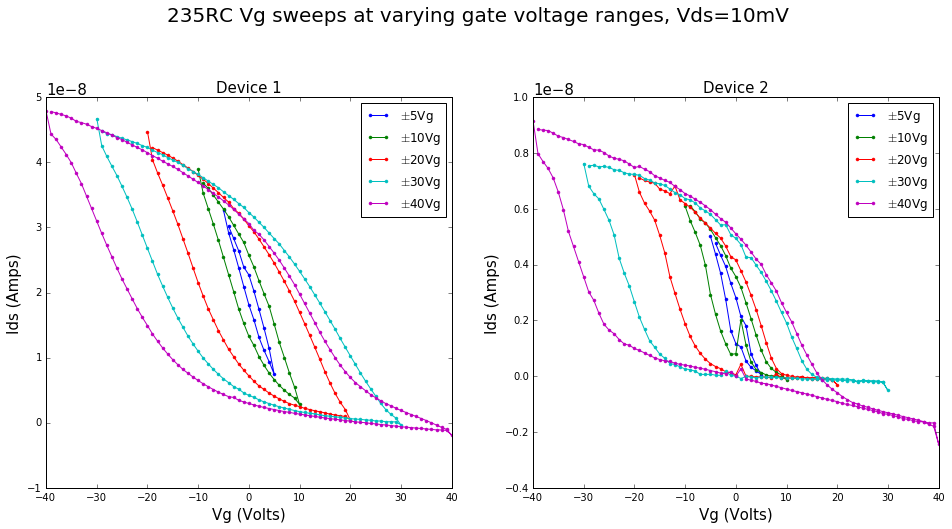

In [25]:
paths1=[
    "235RC/235RC_pin03-13_VgIds_Vds10mV_Vg5updown_2016-07-01_run7.txt",
    "235RC/235RC_pin03-13_VgIds_Vds10mV_Vg10updown_2016-07-01_run8.txt",
    "235RC/235RC_pin03-13_VgIds_Vds10mV_Vg20updown_2016-07-01_run9.txt",
    "235RC/235RC_pin03-13_VgIds_Vds10mV_Vg30updown_2016-07-01_run10.txt"
     ,"235RC/235RC_pin03-13_VgIds_Vds10mV_Vg40updown_2016-07-04_run3.txt"
]

paths2=[
    "235RC/235RC_pin06-10_VgIds_Vds10mV_Vg5updown_2016-07-03_run3.txt",
    "235RC/235RC_pin06-10_VgIds_Vds10mV_Vg10updown_2016-07-03_run4.txt",
    "235RC/235RC_pin06-10_VgIds_Vds10mV_Vg20updown_2016-07-03_run5.txt",
    "235RC/235RC_pin06-10_VgIds_Vds10mV_Vg30updown_2016-07-03_run6.txt"
    ,"235RC/235RC_pin06-10_VgIds_Vds10mV_Vg40updown_2016-07-04_run4.txt"
]



fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(121)
plotsweepsback(ax1,paths1,"Device 1")
ax2=plt.subplot(122)
plotsweepsback(ax2,paths2,"Device 2")

fig.suptitle("235RC Vg sweeps at varying gate voltage ranges, Vds=10mV",fontsize=20,y=1.08)
offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax2.yaxis.get_offset_text()
offset_text.set_size(15)

['235RC/235RC_pin03-13_VgIds_Vds10mV_Vg-5_pin12Vtop15updown_2016-07-05_run6.txt', '235RC/235RC_pin03-13_VgIds_Vds10mV_Vg-5_pin02Vtop15updown_2016-07-05_run4.txt', '235RC/235RC_pin03-13_VgIds_Vds10mV_Vg-5_pin11Vtop15updown_2016-07-05_run5.txt', '235RC/235RC_pin03-13_VgIds_Vds10mV_Vg-5_pin02-12Vpinch15updown_2016-07-05_run7.txt', '235RC/235RC_pin03-13_VgIds_Vds10mV_Vg-5_pin01Vtop15updown_2016-07-05_run3.txt'] ['235RC/235RC_pin06-10_VgIds_Vds10mV_Vg-5_pin09Vtop15updown_2016-07-05_run11.txt', '235RC/235RC_pin06-10_VgIds_Vds10mV_Vg-5_pin04Vtop15updown_2016-07-05_run8.txt', '235RC/235RC_pin06-10_VgIds_Vds10mV_Vg-5_pin05Vtop15updown_2016-07-05_run9.txt', '235RC/235RC_pin06-10_VgIds_Vds10mV_Vg-5_pin05-09Vpinch15updown_2016-07-05_run12.txt', '235RC/235RC_pin06-10_VgIds_Vds10mV_Vg-5_pin08Vtop15updown_2016-07-05_run10.txt']


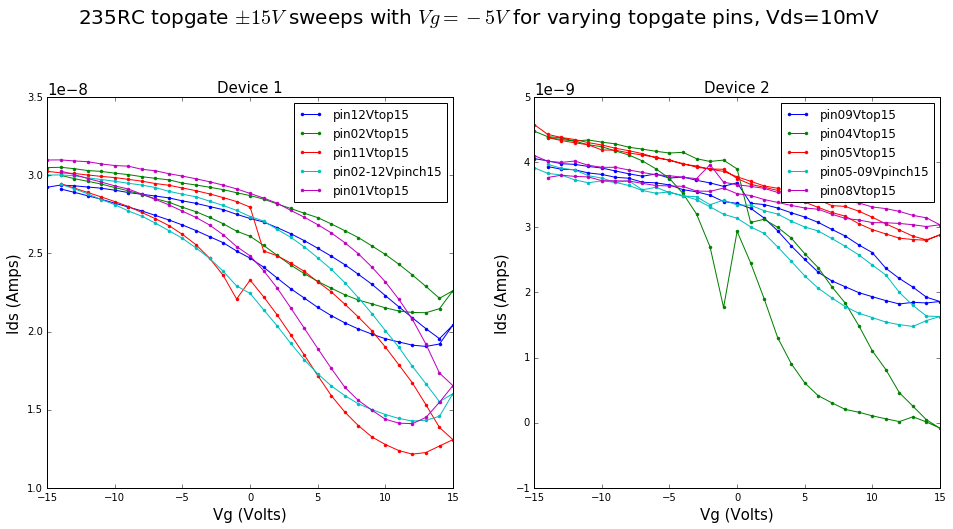

In [4]:
paths1,paths2=[],[]
listdir=os.listdir("235RC/")
for path in listdir:
    if ("top" in path or "pinch" in path) and  "VgIds" in path and "Vg-5" in path:
        if "03-13" in path:
            paths1.append(os.path.join("235RC",path))
        elif "06-10" in path:
            paths2.append(os.path.join("235RC",path))
print(paths1,paths2)            
fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(121)
plotsweepstop(ax1,paths1,"Device 1")
ax2=plt.subplot(122)
plotsweepstop(ax2,paths2,"Device 2")

fig.suptitle("235RC topgate $\pm15V$ sweeps with $Vg = -5V$ for varying topgate pins, Vds=10mV",fontsize=20,y=1.08)
offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax2.yaxis.get_offset_text()
offset_text.set_size(15)

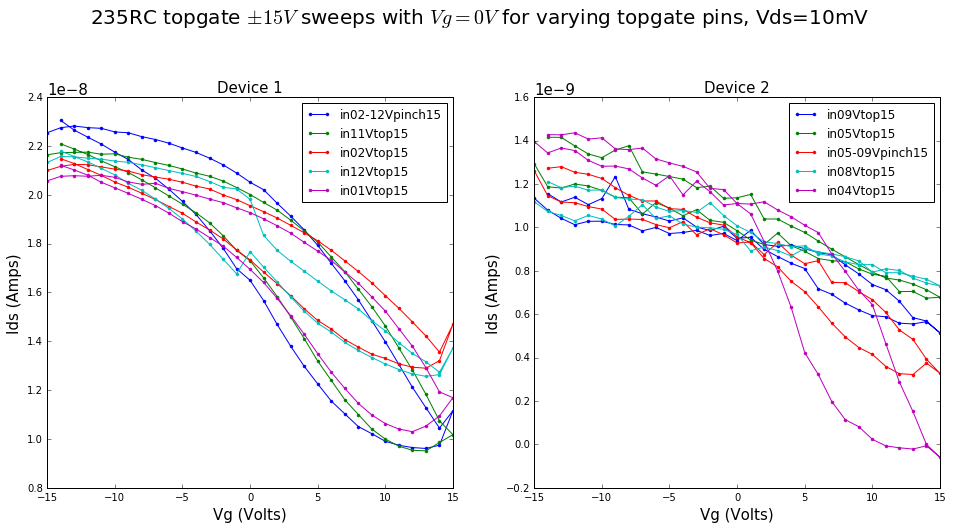

In [5]:
paths1,paths2=[],[]
listdir=os.listdir("235RC/")
for path in listdir:
    if ("top15" in path or "pinch15" in path) and  "VgIds" in path and "Vg0" in path:
        if "03-13" in path:
            paths1.append(os.path.join("235RC",path))
        elif "06-10" in path:
            paths2.append(os.path.join("235RC",path))
# print(paths1,paths2)            
fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(121)
plotsweepstop(ax1,paths1,"Device 1",)
ax2=plt.subplot(122)
plotsweepstop(ax2,paths2,"Device 2")

fig.suptitle("235RC topgate $\pm15V$ sweeps with $Vg = 0V$ for varying topgate pins, Vds=10mV",fontsize=20,y=1.08)
offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax2.yaxis.get_offset_text()
offset_text.set_size(15)

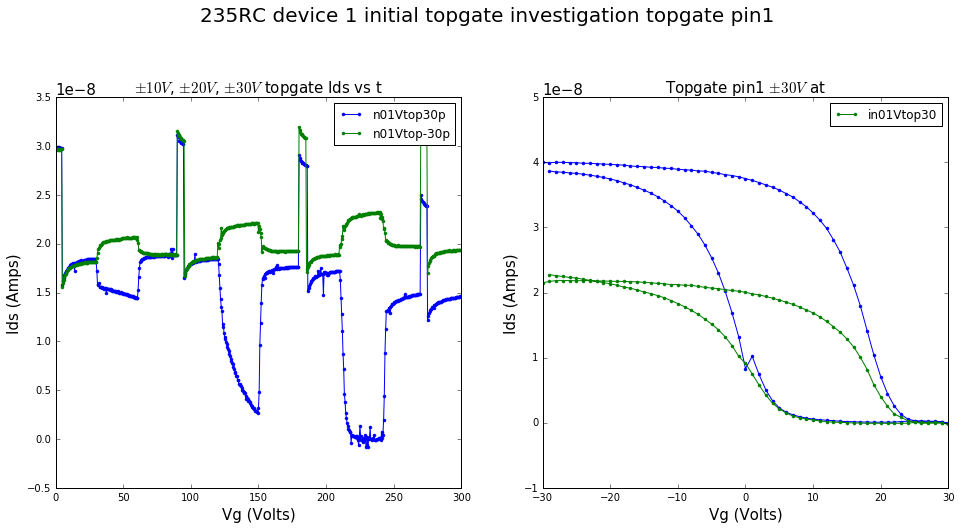

In [15]:
paths1,paths2=[],[]
listdir=os.listdir("235RC/")
for path in listdir:
    if ("top30" in path or "top-30" in path)and "2016-07-05" in path :
        if "IdsT" in path :
            paths1.append(os.path.join("235RC",path))
        elif "VgIds" in path:
            paths2.append(os.path.join("235RC",path))

# print(paths1,paths2)            
fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(121)
plotsweepstop(ax1,paths1,"$\pm 10V$, $\pm 20V$, $\pm 30V$ topgate Ids vs t")
ax2=plt.subplot(122)
plotsweepstop(ax2,paths2,"Topgate pin1 $\pm 30V$ at ")

fig.suptitle("235RC device 1 initial topgate investigation topgate pin1",fontsize=20,y=1.08)
offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax2.yaxis.get_offset_text()
offset_text.set_size(15)

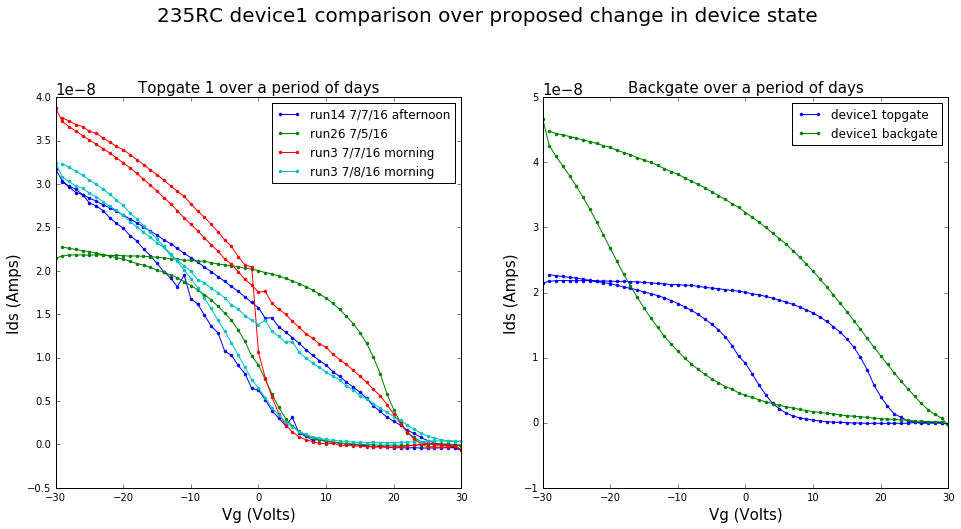

In [22]:


def plotsweepstop(ax,paths,title,labels=""):
    listir=os.listdir("235RC/")
    for path in paths:   
        data=np.genfromtxt(path,skip_header=1)
        if type(labels)!=list:
            ax.plot(data[:,0],data[:,1],".-",label=path)
        elif len(labels)==len(paths):
            ax.plot(data[:,0],data[:,1],".-",label=labels[paths.index(path)])
        else:
            print("Missmatch between labels and plots")
    ax.set_xlabel("Vg (Volts)",fontsize=15)
    ax.set_ylabel("Ids (Amps)",fontsize=15)
    ax.set_title(title,fontsize=15)
    ax.legend()
    
paths1=[
    "235RC/235RC_pin03-13_VgIds_Vds10mV_Vg0_pin01Vtop30updown_2016-07-07_run14.txt",
    "235RC/235RC_pin03-13_VgIds_Vds10mV_Vg0_pin01Vtop30updown_2016-07-05_run26.txt",
    "235RC/235RC_pin03-13_VgIds_Vds10mV_Vg0_pin01Vtop30updown_2016-07-07_run3.txt",
    "235RC/235RC_pin03-13_VgIds_Vds10mV_Vg0_pin01Vtop30updown_2016-07-08_run3.txt"
]
paths2=[
    "235RC/235RC_pin03-13_VgIds_Vds10mV_Vg30updown_2016-07-01_run10.txt",
    "235RC/235RC_pin03-13_VgIds_Vds10mV_Vg30updown_2016-07-07_run13.txt"
]
labels1=["run14 7/7/16 afternoon","run26 7/5/16","run3 7/7/16 morning","run3 7/8/16 morning"]
labels2=["run10 7/1/16","run13 7/7/16"]
# listdir=os.listdir("235RC/")
# for path in listdir:
#     if "2016-07-07" in path :
#         if "VgIds" in path and "Vg30" in path    :
#             paths1.append(os.path.join("235RC",path))
#         elif "VgIds" in path and "Vtop30" and "pin1" in path:
#             paths2.append(os.path.join("235RC",path))

# print(paths1,paths2)  

fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(121)
plotsweepstop(ax1,paths1,"Topgate 1 over a period of days",labels=labels1)
ax2=plt.subplot(122)
plotsweepstop(ax2,[paths1[1],paths2[0]],"Backgate over a period of days",labels=["device1 topgate","device1 backgate"])

fig.suptitle("235RC device1 comparison over proposed change in device state",fontsize=20,y=1.08)
offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax2.yaxis.get_offset_text()
offset_text.set_size(15)



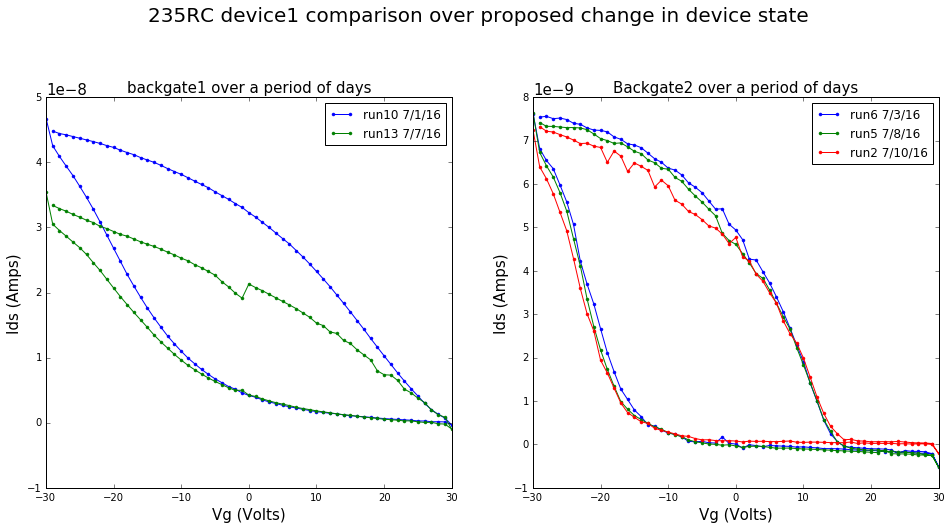

In [11]:


def plotsweepstop(ax,paths,title,labels=""):
    listir=os.listdir("235RC/")
    for path in paths:   
        data=np.genfromtxt(path,skip_header=1)
        if type(labels)!=list:
            ax.plot(data[:,0],data[:,1],".-",label=path)
        elif len(labels)==len(paths):
            ax.plot(data[:,0],data[:,1],".-",label=labels[paths.index(path)])
        else:
            print("Missmatch between labels and plots")
    ax.set_xlabel("Vg (Volts)",fontsize=15)
    ax.set_ylabel("Ids (Amps)",fontsize=15)
    ax.set_title(title,fontsize=15)
    ax.legend()
    
paths1=[
    "235RC/235RC_pin06-10_VgIds_Vds10mV_Vg30updown_2016-07-03_run6.txt",
    "235RC/235RC_pin06-10_VgIds_Vds10mV_Vg30updown_2016-07-08_run5.txt",
    "235RC/235RC_pin06-10_VgIds_Vds10mV_Vg30updown_2016-07-10_run2.txt"
    
]
paths2=[
    "235RC/235RC_pin03-13_VgIds_Vds10mV_Vg30updown_2016-07-01_run10.txt",
    "235RC/235RC_pin03-13_VgIds_Vds10mV_Vg30updown_2016-07-07_run13.txt"
]
labels1=["run6 7/3/16","run5 7/8/16","run2 7/10/16"]
labels2=["run10 7/1/16","run13 7/7/16"]
# listdir=os.listdir("235RC/")
# for path in listdir:
#     if "2016-07-07" in path :
#         if "VgIds" in path and "Vg30" in path    :
#             paths1.append(os.path.join("235RC",path))
#         elif "VgIds" in path and "Vtop30" and "pin1" in path:
#             paths2.append(os.path.join("235RC",path))

# print(paths1,paths2)  

fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(121)
plotsweepstop(ax1,paths2,"backgate1 over a period of days",labels=labels2)
ax2=plt.subplot(122)
plotsweepstop(ax2,paths1,"Backgate2 over a period of days",labels=labels1)

fig.suptitle("235RC device1 comparison over proposed change in device state",fontsize=20,y=1.08)
offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax2.yaxis.get_offset_text()
offset_text.set_size(15)



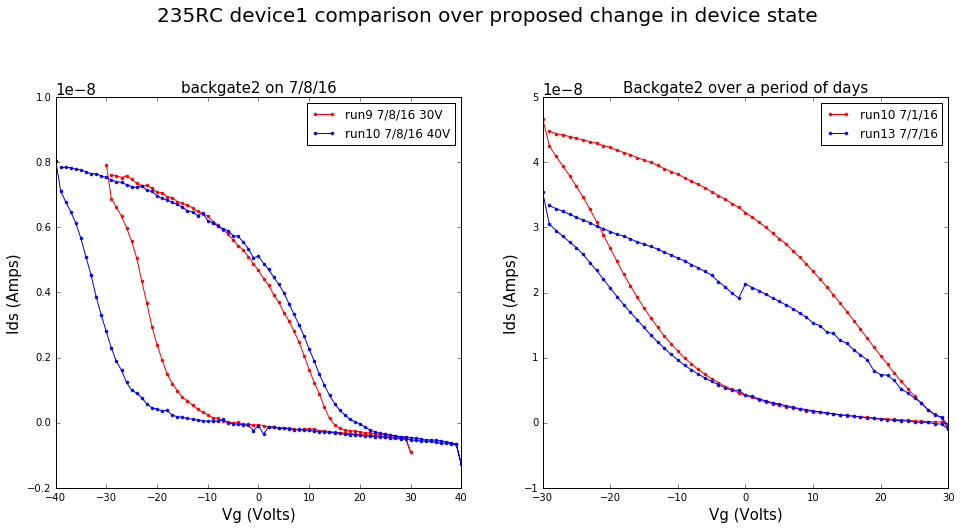

In [11]:



    
paths1=[
    "235RC/235RC_pin06-10_VgIds_Vds10mV_Vg30updown_2016-07-08_run9.txt",
    "235RC/235RC_pin06-10_VgIds_Vds10mV_Vg30updown_2016-07-08_run10.txt"
]
paths2=[
    "235RC/235RC_pin03-13_VgIds_Vds10mV_Vg30updown_2016-07-01_run10.txt",
    "235RC/235RC_pin03-13_VgIds_Vds10mV_Vg30updown_2016-07-07_run13.txt"
]
labels1=["run9 7/8/16 30V","run10 7/8/16 40V"]
colors1=['r','b']
labels2=["run10 7/1/16","run13 7/7/16"]
colors2=['r','b']
# listdir=os.listdir("235RC/")
# for path in listdir:
#     if "2016-07-07" in path :
#         if "VgIds" in path and "Vg30" in path    :
#             paths1.append(os.path.join("235RC",path))
#         elif "VgIds" in path and "Vtop30" and "pin1" in path:
#             paths2.append(os.path.join("235RC",path))

# print(paths1,paths2)  

fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(121)
plotsweepstop(ax1,paths1,"backgate2 on 7/8/16",labels=labels1,colors=colors1)
ax2=plt.subplot(122)
plotsweepstop(ax2,paths2,"Backgate1 over a period of days",labels=labels2,colors=colors2)

fig.suptitle("235RC backgate comparison over proposed change in device state",fontsize=20,y=1.08)
offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax2.yaxis.get_offset_text()
offset_text.set_size(15)



paths1
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin4Vtop20updown_2016-07-09_run4.txt
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin4Vtop10updown_2016-07-09_run3.txt
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin4Vtop30updown_2016-07-09_run5.txt


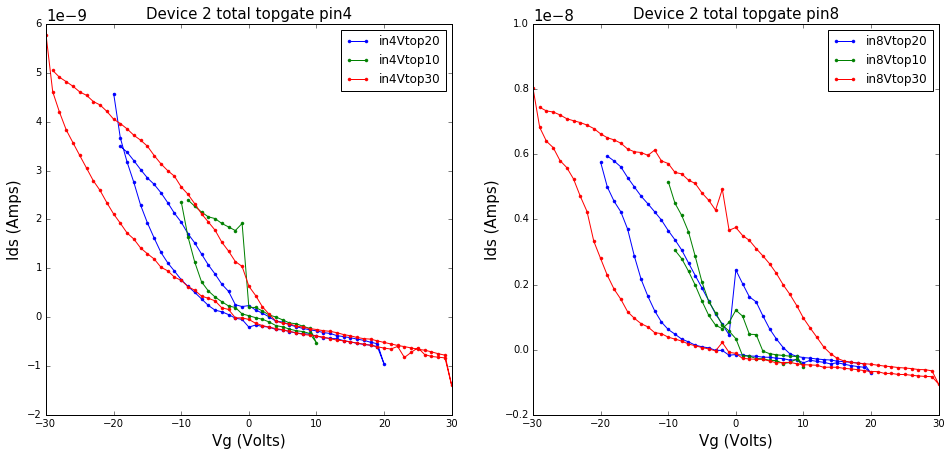

In [14]:
paths1,paths2=[],[]
listdir=os.listdir("235RC/")
for path in listdir:
    if "VgIds" in path and "Vg0" in path:
        if  "2016-07-09" in path and "pin4" in path :
            paths1.append(os.path.join("235RC",path))
        if  "2016-07-09" in path and "pin8" in path:
            paths2.append(os.path.join("235RC",path))
def printlist(inlist):
    for i in inlist:
        print (i)
print("paths1")
printlist(paths1)
# print("paths2")
# printlist(paths2)
labels1=[
    "pin02-12 pinch",
    "pin11 total",
    "pin02 partial",
    "pin12 partial",
    "pin01 total"
]
colors1=['g','b','r','r','b']

fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(121)
plotsweepstop(ax1,paths1,"Device 2 total topgate pin4")#,labels=labels1,colors=colors1)
ax2=plt.subplot(122)
plotsweepstop(ax2,paths2,"Device 2 total topgate pin8")

offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax2.yaxis.get_offset_text()
offset_text.set_size(15)

# fig.savefig(os.path.join("plots",) format="jpg")


paths1
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin5Vtoppinch20updown_2016-07-09_run14.txt
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin5Vtoppinch10updown_2016-07-09_run13.txt
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin5Vtoppinch30updown_2016-07-09_run15.txt


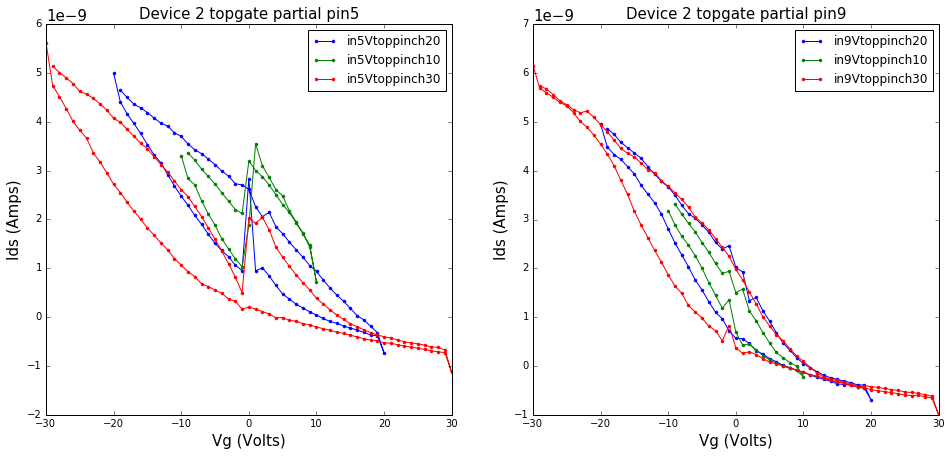

In [10]:
paths1,paths2=[],[]
listdir=os.listdir("235RC/")
for path in listdir:
    if "VgIds" in path and "Vg0" in path:
        if  "2016-07-09" in path and "pin5V" in path :
            paths1.append(os.path.join("235RC",path))
        if  "2016-07-09" in path and "pin9V" in path:
            paths2.append(os.path.join("235RC",path))
def printlist(inlist):
    for i in inlist:
        print (i)
print("paths1")
printlist(paths1)
# print("paths2")
# printlist(paths2)
labels1=[
    "pin02-12 pinch",
    "pin11 total",
    "pin02 partial",
    "pin12 partial",
    "pin01 total"
]
colors1=['g','b','r','r','b']

fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(121)
plotsweepstop(ax1,paths1,"Device 2 topgate partial pin5")#,labels=labels1,colors=colors1)
ax2=plt.subplot(122)
plotsweepstop(ax2,paths2,"Device 2 topgate partial pin9")

offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax2.yaxis.get_offset_text()
offset_text.set_size(15)

# fig.savefig(os.path.join("plots",) format="jpg")


paths1
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin5-9Vtoppinch20updown_2016-07-09_run11.txt
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin5-9Vtoppinch10updown_2016-07-09_run10.txt
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin5-9Vtoppinch30updown_2016-07-09_run12.txt
paths2
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin4Vtop30updown_2016-07-09_run5.txt
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin5-9Vtoppinch30updown_2016-07-09_run12.txt
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin8Vtop30updown_2016-07-09_run9.txt
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin5Vtoppinch30updown_2016-07-09_run15.txt
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin9Vtoppinch30updown_2016-07-09_run18.txt


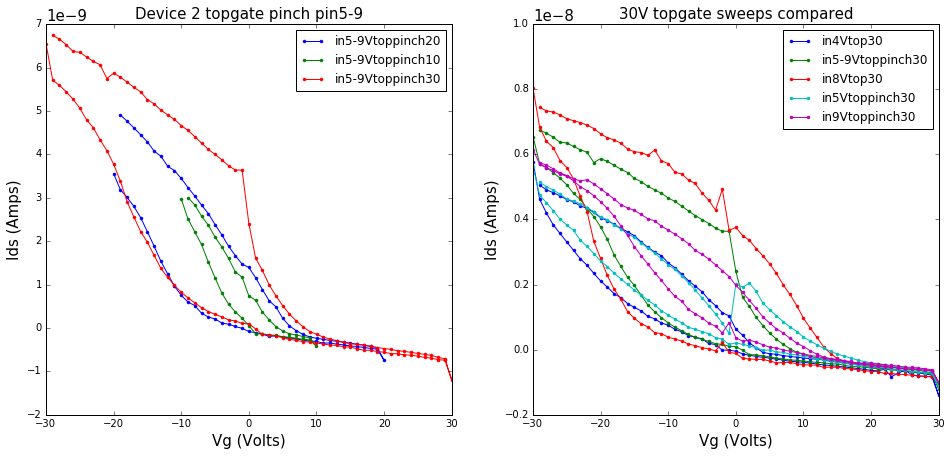

In [18]:
paths1,paths2=[],[]
listdir=os.listdir("235RC/")
for path in listdir:
    if "VgIds" in path and "Vg0" in path:
        if  "2016-07-09" in path and "pin5-9" in path :
            paths1.append(os.path.join("235RC",path))
        if  "2016-07-09" in path and "30updown" in path and "top" in path:
            paths2.append(os.path.join("235RC",path))
def printlist(inlist):
    for i in inlist:
        print (i)
print("paths1")
printlist(paths1)
print("paths2")
printlist(paths2)
labels1=[
    "pin02-12 pinch",
    "pin11 total",
    "pin02 partial",
    "pin12 partial",
    "pin01 total"
]
colors1=['g','b','r','r','b']

fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(121)
plotsweepstop(ax1,paths1,"Device 2 topgate pinch pin5-9")#,labels=labels1,colors=colors1)
ax2=plt.subplot(122)
plotsweepstop(ax2,paths2,"30V topgate sweeps compared")

offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax2.yaxis.get_offset_text()
offset_text.set_size(15)

# fig.savefig(os.path.join("plots",) format="jpg")


paths1
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin4Vtop20updown_2016-07-09_run4.txt
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin5-9Vtoppinch20updown_2016-07-09_run11.txt
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin8Vtop20updown_2016-07-09_run7.txt
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin9Vtoppinch20updown_2016-07-09_run17.txt
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin5Vtoppinch20updown_2016-07-09_run14.txt
paths2
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin4Vtop30updown_2016-07-09_run5.txt
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin5-9Vtoppinch30updown_2016-07-09_run12.txt
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin8Vtop30updown_2016-07-09_run9.txt
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin5Vtoppinch30updown_2016-07-09_run15.txt
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin9Vtoppinch30updown_2016-07-09_run18.txt


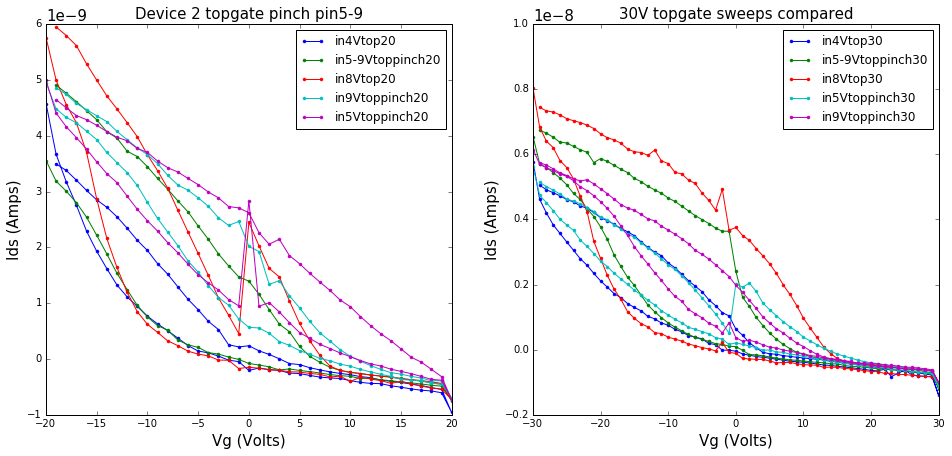

In [6]:
paths1,paths2=[],[]
listdir=os.listdir("235RC/")
for path in listdir:
    if "VgIds" in path and "Vg0" in path:
        if  "2016-07-09" in path and "20updown" in path and "top" in path:
            paths1.append(os.path.join("235RC",path))
        if  "2016-07-09" in path and "30updown" in path and "top" in path:
            paths2.append(os.path.join("235RC",path))
def printlist(inlist):
    for i in inlist:
        print (i)
print("paths1")
printlist(paths1)
print("paths2")
printlist(paths2)
labels1=[
    "pin02-12 pinch",
    "pin11 total",
    "pin02 partial",
    "pin12 partial",
    "pin01 total"
]
colors1=['g','b','r','r','b']

fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(121)
plotsweepstop(ax1,paths1,"Device 2 topgate pinch pin5-9")#,labels=labels1,colors=colors1)
ax2=plt.subplot(122)
plotsweepstop(ax2,paths2,"30V topgate sweeps compared")

offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax2.yaxis.get_offset_text()
offset_text.set_size(15)

# fig.savefig(os.path.join("plots",) format="jpg")


paths1
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg20_pin4Vtop30updown_2016-07-10_run3.txt
paths2
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin8Vtop30updown_2016-07-09_run9.txt
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin4Vtop30updown_2016-07-09_run5.txt
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg30updown_2016-07-10_run2.txt


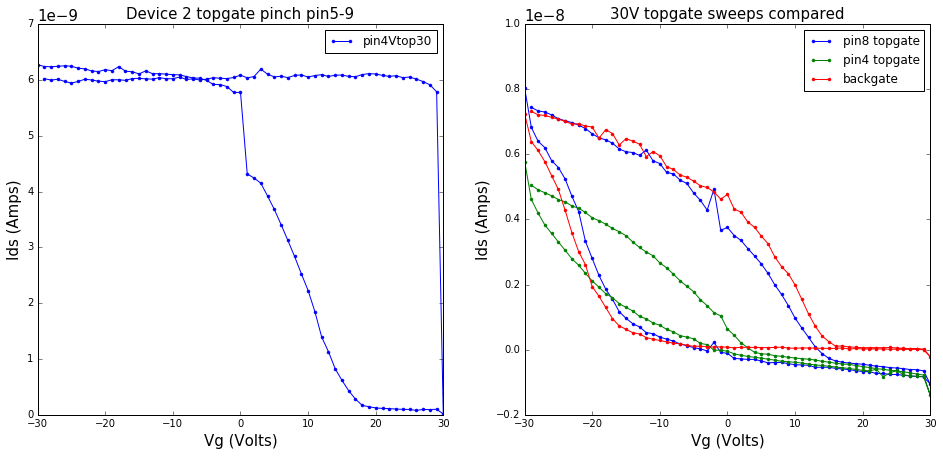

In [13]:
paths1,paths2=[],[]
listdir=os.listdir("235RC/")
for path in listdir:
    if "VgIds" in path:
        if  "2016-07-10" in path and "30updown" in path and "top" in path:
            paths1.append(os.path.join("235RC",path))
            
paths2=[
    "235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin8Vtop30updown_2016-07-09_run9.txt",
    "235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin4Vtop30updown_2016-07-09_run5.txt",
    "235RC/235RC_pin06-10_VgIds_Vds10mV_Vg30updown_2016-07-10_run2.txt"
]
def printlist(inlist):
    for i in inlist:
        print (i)
print("paths1")
printlist(paths1)
print("paths2")
printlist(paths2)
labels2=[
    "pin8 topgate",
    "pin4 topgate",
    "backgate"
]
colors1=['g','b','r','r','b']

fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(121)
plotsweepstop(ax1,paths1,"Device 2 topgate pinch pin5-9")#,labels=labels1,colors=colors1)
ax2=plt.subplot(122)
plotsweepstop(ax2,paths2,"30V topgate sweeps compared",labels=labels2)

offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)
offset_text = ax2.yaxis.get_offset_text()
offset_text.set_size(15)

# fig.savefig(os.path.join("plots",) format="jpg")
